Installing necessary packages

In [ ]:
install.packages('BSDA')
library(BSDA)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(tidyverse)

Reading the raw data file

In [ ]:
df <- read.csv('imdb_movie_data.csv')

Data Cleaning

In [ ]:
data <- df %>% drop_na(revenue)

In [ ]:
data$cleaned_release_year <- as.integer(substr(data$release_year, nchar(data$release_year) - 3, nchar(data$release_year)))

In [ ]:
remove_comma <- function(x){
  gsub(",","",x)
}

In [ ]:
data$cleaned_revenue <- as.integer(lapply(data$revenue, remove_comma))

Taking movies in the US in the 21st century to account for consumer bias and inflation.

In [ ]:
us_21cen_data <- data %>% filter(country == 'United States') %>% filter(cleaned_release_year >= 2000)

Our threshold to determine a long movie is 120 min, which is close to mean + sd


In [ ]:
mean(us_21cen_data$runtime)+sd(us_21cen_data$runtime)

[1] 123.9654

Visualizations

In [ ]:
# Convert column to lowercase
us_21cen_data$genre_cleaned <- tolower(us_21cen_data$genre)
# Remove spaces from the column
us_21cen_data$genre_cleaned<- gsub(" ", "", us_21cen_data$genre)

In [ ]:
counts <- table(us_21cen_data$genre_cleaned)
counts_genre <- as.data.frame(counts)
colnames(counts_genre) <- c("Unique_Genres", "Occurrences")

print(counts_genre)

   Unique_Genres Occurrences
1         Action          93
2      Adventure          15
3      Animation          22
4      Biography          23
5         Comedy         114
6          Crime          21
7          Drama          60
8         Horror          30
9        Mystery           1
10        Sci-Fi           1


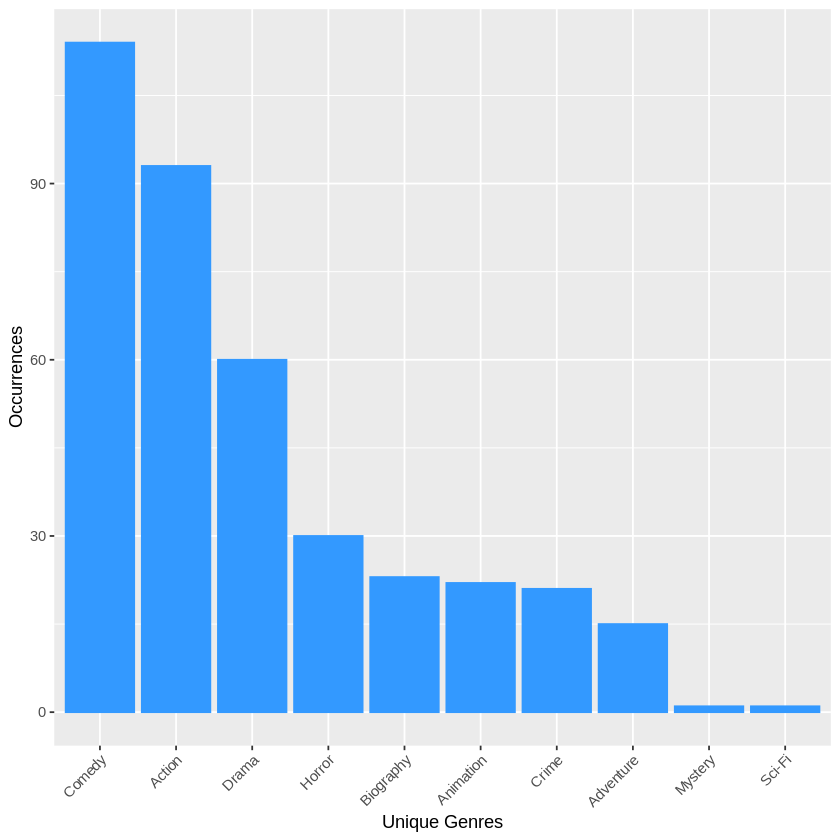

In [ ]:
ggplot(counts_genre, aes(x = reorder(Unique_Genres, -Occurrences), y = Occurrences)) +
  geom_bar(stat = "identity", fill = "#3399FF", color = "#3399FF") +
  labs(x = "Unique Genres", y = "Occurrences") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

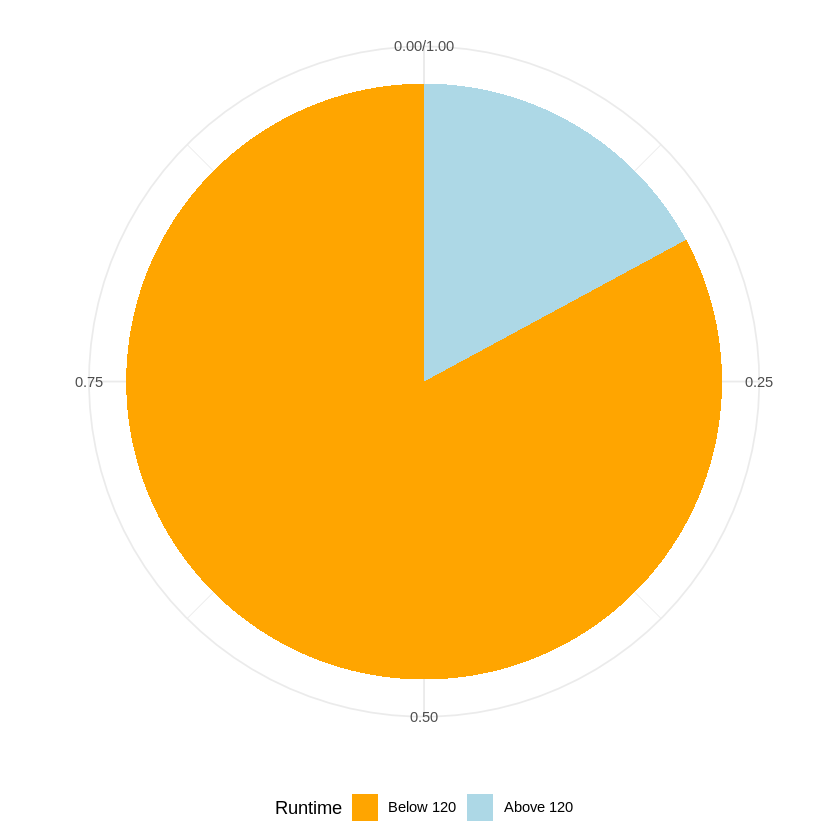

In [ ]:
percentage_data <- us_21cen_data %>%
  group_by(runtime_category = factor(runtime > 120, labels = c("Below 120", "Above 120"))) %>%
  summarize(percentage = n() / nrow(us_21cen_data))

# Create a pie chart with colors representing the percentage
ggplot(percentage_data, aes(x = "", y = percentage, fill = runtime_category)) +
  geom_bar(stat = "identity") +
  coord_polar("y") +  # Convert to polar coordinates for a pie chart
  labs(x = NULL, y = NULL, fill = "Runtime") +
  scale_fill_manual(values = c("orange", "lightblue"), guide = "legend") +
  theme_minimal() +
  theme(legend.position = "bottom")  # Adjust the legend position

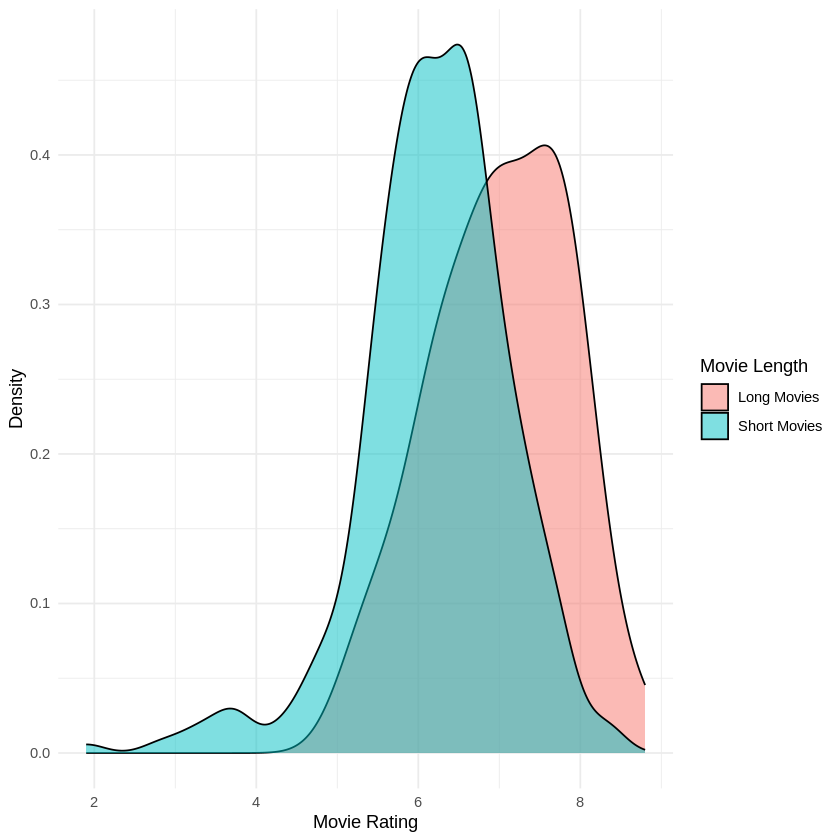

In [ ]:
rating_data <- data.frame(
  category = rep(c("Short Movies", "Long Movies"),
                 c(length(short_movie_rating), length(long_movie_rating))),
  rating = c(short_movie_rating, long_movie_rating)
)

# Create a normal distribution plot for movie length vs. movie rating
ggplot(rating_data, aes(x = rating, fill = category)) +
  geom_density(alpha = 0.5) +
  labs(x = "Movie Rating", y = "Density", fill = "Movie Length") +
  theme_minimal()

In [ ]:
short_movie_release_year = short_movies$release_year
long_movie_release_year = long_movies$release_year

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message:
“Removed 23 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 23 rows containing missing values (`geom_point()`).”


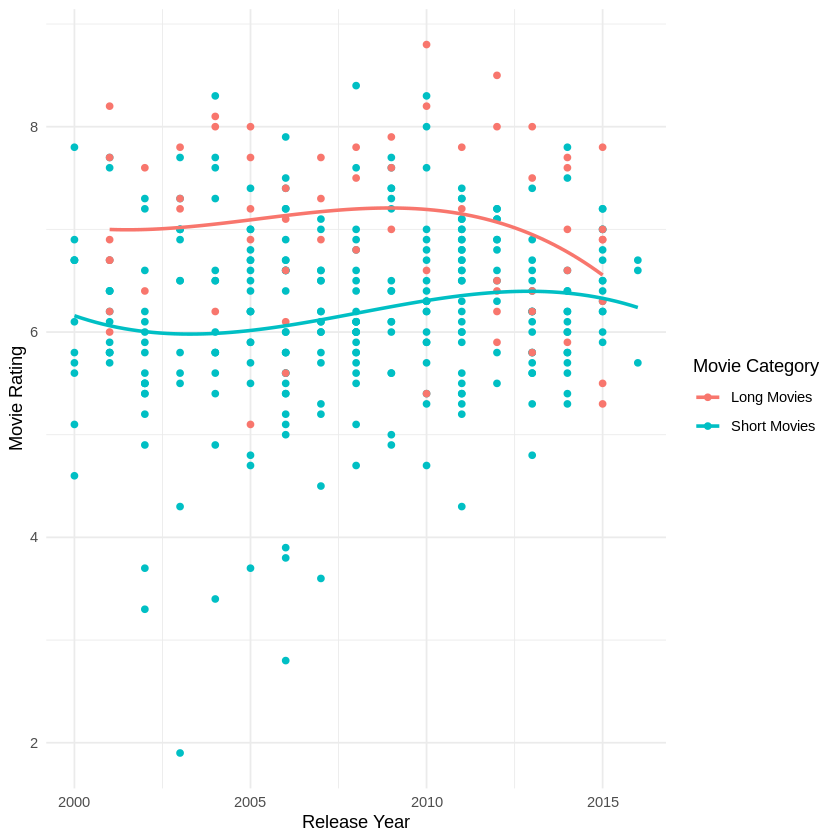

In [ ]:
rating_year <- data.frame(
  category = rep(c("Short Movies", "Long Movies"),
                 c(length(short_movie_release_year), length(long_movie_release_year))),
  release_year = c(short_movie_release_year, long_movie_release_year),
  rating = c(short_movie_rating, long_movie_rating)
)

ggplot(rating_year, aes(x = as.numeric(release_year), y = rating, color = category)) +
  geom_point() +
  stat_smooth(method = "lm", se = FALSE, formula = y ~ poly(x, 3), size = 1) +
  labs(x = "Release Year", y = "Movie Rating", color = "Movie Category") +
  theme_minimal()

Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”
Warning message:
“Removed 23 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 23 rows containing missing values (`geom_point()`).”


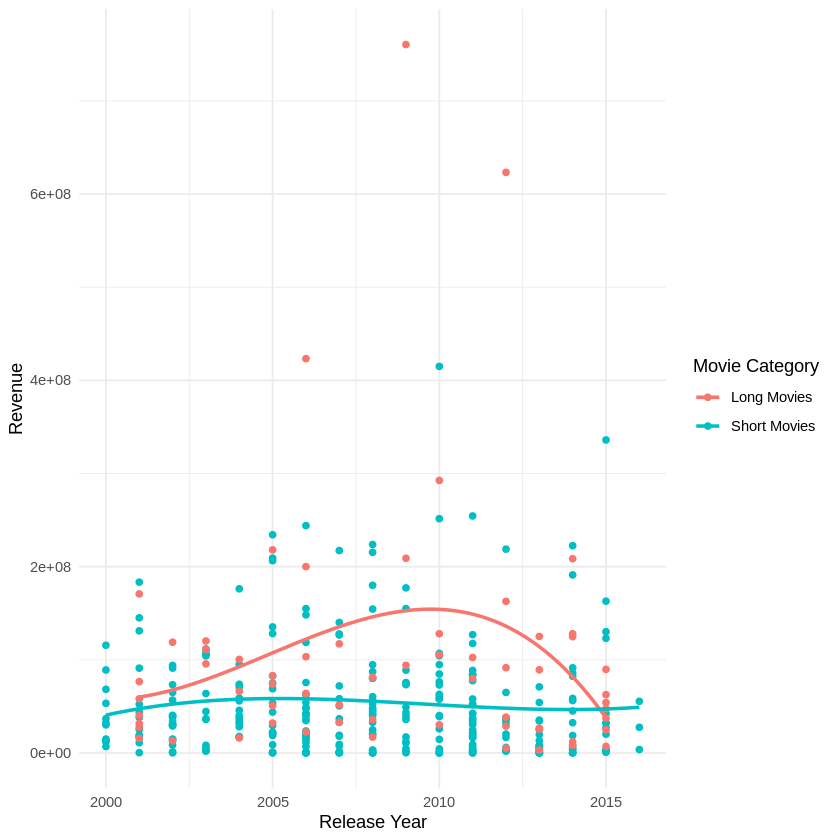

In [ ]:
revenue_year <- data.frame(
  category = rep(c("Short Movies", "Long Movies"),
                 c(length(short_movie_revenue), length(long_movie_revenue))),
  revenue = c(short_movie_revenue, long_movie_revenue),
  release_year = c(short_movie_release_year, long_movie_release_year)
)

ggplot(revenue_year, aes(x = as.numeric(release_year), y = revenue, color = category)) +
  geom_point() +
  labs(x = "Release Year", y = "Revenue", color = "Movie Category") +
   stat_smooth(method = "lm", se = FALSE, formula = y ~ poly(x, 3), size = 1)+
  theme_minimal()

Sample size of short movies

In [ ]:
short_movies <- us_21cen_data %>% filter(us_21cen_data$runtime < 120)
length(short_movies$runtime)

[1] 311

Sample size of long movies

In [ ]:
long_movies <- us_21cen_data %>% filter(us_21cen_data$runtime > 120)
length(long_movies$rating)

[1] 65

Both the samples have a large size and CLT can be applied

In [ ]:
short_movie_rating <- short_movies$rating
long_movie_rating <- long_movies$rating

Z-tests

In [ ]:
short_movie_revenue <- short_movies$cleaned_revenue
long_movie_revenue <- long_movies$cleaned_revenue

Z test to determine significance of difference in ratings

In [ ]:
z.test(x=short_movie_rating,y=long_movie_rating,alternative = 'less',sigma.x = sd(short_movie_rating), sigma.y = sd(long_movie_rating))


	Two-sample z-Test

data:  short_movie_rating and long_movie_rating
z = -6.8757, p-value = 3.085e-12
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
         NA -0.6097162
sample estimates:
mean of x mean of y 
 6.209325  7.010769 


Z test to determine significance of difference in revenue

In [ ]:
z.test(x=short_movie_revenue,y=long_movie_revenue,alternative = 'less', sigma.x = sd(short_movie_revenue), sigma.y = sd(long_movie_revenue))


	Two-sample z-Test

data:  short_movie_revenue and long_movie_revenue
z = -2.9486, p-value = 0.001596
alternative hypothesis: true difference in means is less than 0
95 percent confidence interval:
        NA -21442604
sample estimates:
mean of x mean of y 
 52676476 101171824 


From the very low p-values it can be concluded that movies over 2hr duration are popular and do good commercially.